In [2]:
import pandas as pd
# import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Battery and assault
df = pd.read_csv('Resources/data3_load_assault_group_to_ML.csv',parse_dates =["Booking_year_month"])
df.head()

,Unnamed: 0,Booking_year_month,total_crime,total_crime_3,age<25_3,age26-50_3,age>50_3,day_of_week_Monday_3,day_of_week_Tuesday_3,day_of_week_Wednesday_3,...,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
0,4,2015-09-01,121,132,13,91,28,22,13,23,...,18,22,32,1,0,0,0,5,43,68
1,5,2015-10-01,156,142,18,92,32,14,13,29,...,13,10,16,1,0,0,0,5,44,46
2,6,2015-11-01,114,153,15,112,26,24,17,20,...,18,26,23,0,0,0,1,4,46,75
3,7,2015-12-01,129,121,11,84,26,13,22,23,...,13,17,8,0,0,0,1,3,42,52
4,8,2016-01-01,130,156,16,92,48,13,16,21,...,12,15,14,0,0,0,1,7,37,64


In [3]:
#normalizar
#standar scaler

# Drop innecesary columns
df.drop(['Unnamed: 0', 'Booking_year_month'], axis=1, inplace=True)
# df['total_crime']= df['total_crime'].astype(float)

In [4]:
# Use sklearn's `train_test_split` to split the data into training and testing
# the split of the data in not aleatory "test_size=10"
# Use sklearn's `train_test_split` to split the data into training and testing

from sklearn.model_selection import train_test_split

### Arreglar quien es X y Y!!!!
##The variables used to predict the dependent variable are called INDEPENDENT VARIABLES(X)

X = df.drop('total_crime', axis=1)
y = df['total_crime'].values.reshape(-1, 1)
print(X.shape, y.shape)
#print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=10)

(45, 54) (45, 1)


In [5]:
df.head()

,total_crime,total_crime_3,age<25_3,age26-50_3,age>50_3,day_of_week_Monday_3,day_of_week_Tuesday_3,day_of_week_Wednesday_3,day_of_week_Thursday_3,day_of_week_Friday_3,...,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
0,121,132,13,91,28,22,13,23,24,19,...,18,22,32,1,0,0,0,5,43,68
1,156,142,18,92,32,14,13,29,28,23,...,13,10,16,1,0,0,0,5,44,46
2,114,153,15,112,26,24,17,20,20,18,...,18,26,23,0,0,0,1,4,46,75
3,129,121,11,84,26,13,22,23,24,13,...,13,17,8,0,0,0,1,3,42,52
4,130,156,16,92,48,13,16,21,39,18,...,12,15,14,0,0,0,1,7,37,64


In [6]:
# Create a StandardScaler model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

## Random Forest (Regression)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# We test the Random Forest model with 75, 100, 200, 300, 500 trees, and with the random seed = 1
# the best estimator was 75 trees.

model = RandomForestRegressor(n_estimators=200, random_state=1)

# Fitting our model with all of our features in X:

model.fit(X_train_scaled , y_train_scaled)

# Predicting:

y_prediction = model.predict(X_test_scaled)
y_prediction = y_scaler.inverse_transform(y_prediction)

# Calculate the MAE and MSE()
randomF_mae = mean_absolute_error(y_prediction, y_test)
randomF_mse = mean_squared_error(y_prediction, y_test)

print("Mean Absolute Error = ", randomF_mae) 
print("Mean Squarred Error= ", randomF_mse) 
# Please note, the MSE do not is affected by the negative difference values. 
# (the Square root of the mse should be approximately to the mae)

#r2 = r2_score(y_prediction, y_test)
#print("R2 score = ", r2)

Mean Absolute Error =  10.173499999999999
Mean Squarred Error=  123.97947749999999


C:\Users\cmuiz\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [8]:
# The Dtaa has been scaled, we will transform the dat
y_train_predict=model.predict(X_train_scaled)
y_train_predict=y_scaler.inverse_transform(y_train_predict)

In [9]:
y_test_predict=model.predict(X_test_scaled)
y_test_predict=y_scaler.inverse_transform(y_test_predict)

In [10]:
len(y_train_predict)

35

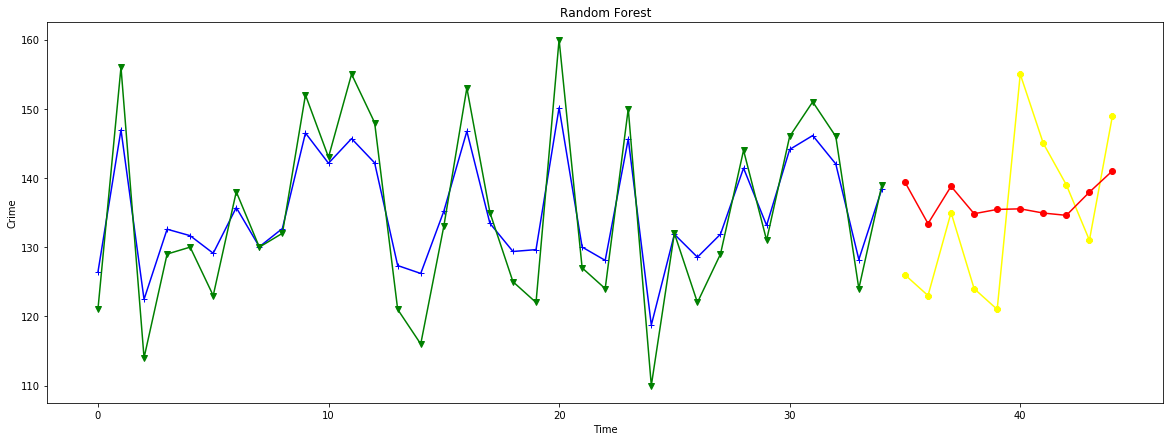

In [11]:
## Plot The Train data predicted vs the train Data.
## and the test prodict vs the test

plt.figure(figsize=(20,7))
date_train_range = range(len(y_train_predict))
plt.plot(date_train_range , y_train_predict, marker='+', color='blue')
plt.plot(date_train_range , y_train, marker='v', color='green')
date_test_range = range(len(y_train_predict),len(y))
plt.plot(date_test_range, y_test, marker='8', color='yellow')
plt.plot(date_test_range, y_test_predict, marker='o', color='red')
plt.title("Random Forest")
plt.xlabel("Time")
plt.ylabel("Crime")
plt.savefig("Random_Forest.png")

In [12]:
# The original data has an array format, to can get the differer=nce we need to :

date_train_range = np.array([i for i in date_train_range])
date_test_range = np.array([i for i in date_test_range])

# the values for ythe Residual plot
train_perc =np.array((y_train.reshape(-1,1) - y_train_predict.reshape(-1,1))*100/y_train.reshape(-1,1))
test_perc =np.array((y_test.reshape(-1,1) - y_test_predict.reshape(-1,1))*100/y_test.reshape(-1,1))
#train_perc

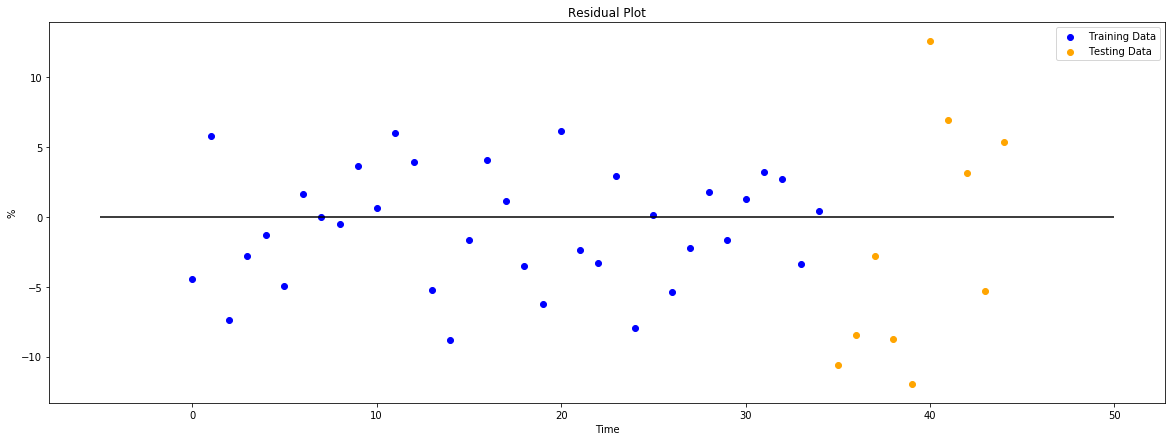

In [13]:
# #Residual Plot
plt.figure(figsize=(20,7))
plt.scatter(date_train_range, train_perc, c="blue", label="Training Data")
plt.scatter(date_test_range, test_perc, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=-5, xmax=50)
plt.title("Residual Plot")
plt.xlabel("Time")
plt.ylabel("%")
plt.savefig("Random_Forest_Residual_Plot.png")

## Linear Regression Model

In [14]:
## Linear Regression


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()

# Fitting our model with all of our features in X:

model.fit(X_train_scaled , y_train_scaled)

# Predicting:

y_prediction = model.predict(X_test_scaled)
y_prediction = y_scaler.inverse_transform(y_prediction)

# Calculate the MAE and MSE()
linear_reg_mae = mean_absolute_error(y_prediction, y_test)
linear_reg_mse = mean_squared_error(y_prediction, y_test)

print("Mean Absolute Error = ", linear_reg_mae) 
print("Mean Squarred Error= ", linear_reg_mse) 
# Please note, the MSE do not is affected by the negative difference values. 
# (the Square root of the mse should be approximately to the mae)

#r2 = r2_score(y_prediction, y_test)
#print("R2 score = ", r2)

Mean Absolute Error =  24.705689904663686
Mean Squarred Error=  1113.5149237601868


In [15]:
# The Dtaa has been scaled, we will transform the dat
y_train_predict=model.predict(X_train_scaled)
y_train_predict=y_scaler.inverse_transform(y_train_predict)

y_test_predict=model.predict(X_test_scaled)
y_test_predict=y_scaler.inverse_transform(y_test_predict)

In [16]:
len(y_train_predict)

35

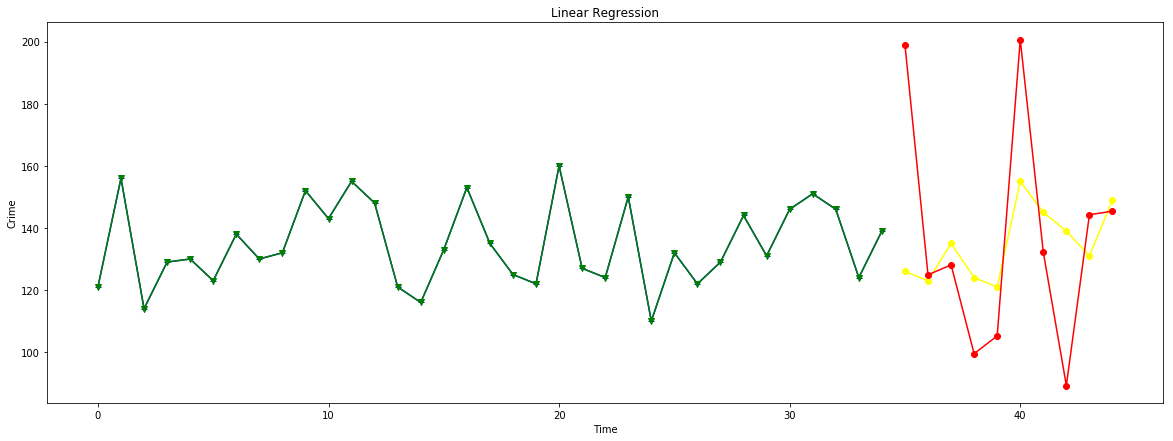

In [17]:
## Plot The Train data predicted vs the train Data.
## and the test prodict vs the test

plt.figure(figsize=(20,7))
date_train_range = range(len(y_train_predict))
plt.plot(date_train_range , y_train_predict, marker='+', color='blue')
plt.plot(date_train_range , y_train, marker='v', color='green')
date_test_range = range(len(y_train_predict),len(y))
plt.plot(date_test_range, y_test, marker='8', color='yellow')
plt.plot(date_test_range, y_test_predict, marker='o', color='red')
plt.title("Linear Regression")
plt.xlabel("Time")
plt.ylabel("Crime")
plt.savefig("Linear_Regression.png")

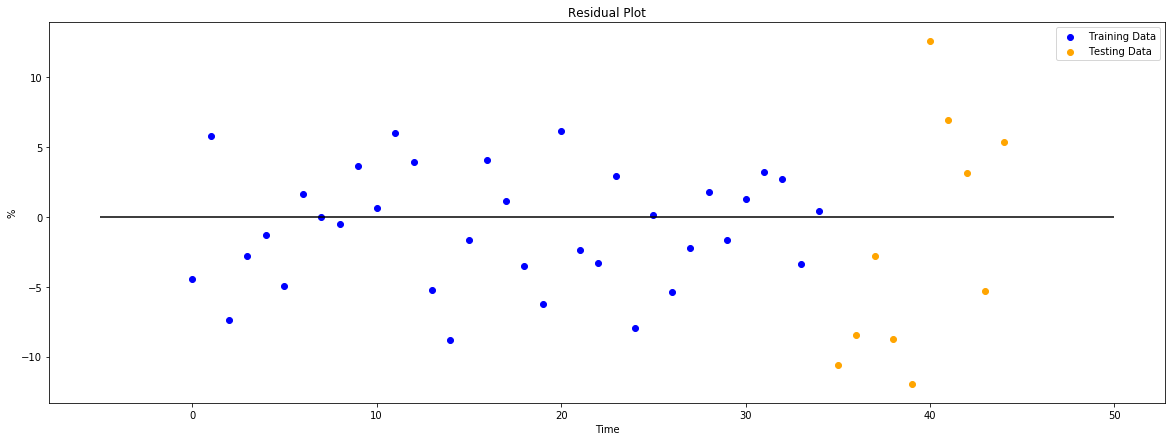

In [18]:
# #Residual Plot
plt.figure(figsize=(20,7))
plt.scatter(date_train_range, train_perc, c="blue", label="Training Data")
plt.scatter(date_test_range, test_perc, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=-5, xmax=50)
plt.title("Residual Plot")
plt.xlabel("Time")
plt.ylabel("%")
plt.savefig("Linear_Regression_Residual_Plot.png")

## SVM

In [19]:
from sklearn import svm

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#We are using the Random Forest model with 75 trees, and with the random seed = 1
model = svm.SVR()

# Fitting our model with all of our features in X

model.fit(X_train_scaled , y_train_scaled)
y_prediction = model.predict(X_test_scaled)
y_prediction = y_scaler.inverse_transform(y_prediction)

# Calculate the MAE and MSE()
svm_mae = mean_absolute_error(y_prediction, y_test)
svm_mse = mean_squared_error(y_prediction, y_test)


print("SVM Mean Absolute Error = ", svm_mae) 
print("SVM Mean Squarred Error= ", svm_mse) 

SVM Mean Absolute Error =  9.707423586853114
SVM Mean Squarred Error=  116.78891744085112


C:\Users\cmuiz\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
y_train_predict=model.predict(X_train_scaled)
y_train_predict=y_scaler.inverse_transform(y_train_predict)

In [22]:
y_test_predict=model.predict(X_test_scaled)
y_test_predict=y_scaler.inverse_transform(y_test_predict)

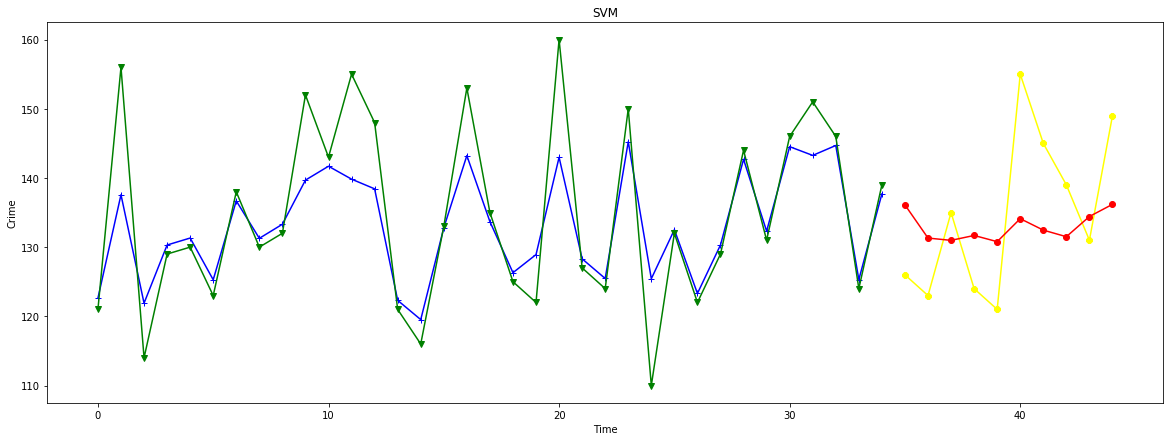

In [23]:
## Plot The Train data predicted vs the train Data.
## and the test prodict vs the test

plt.figure(figsize=(20,7))
date_train_range = range(len(y_train_predict))
plt.plot(date_train_range , y_train_predict, marker='+', color='blue')
plt.plot(date_train_range , y_train, marker='v', color='green')
date_test_range = range(len(y_train_predict),len(y))
plt.plot(date_test_range, y_test, marker='8', color='yellow')
plt.plot(date_test_range, y_test_predict, marker='o', color='red')
plt.title("SVM")
plt.xlabel("Time")
plt.ylabel("Crime")
plt.savefig("SVM.png")

In [24]:
# The original data has an array format, to can get the differernce we need to :

date_train_range = np.array([i for i in date_train_range])
date_test_range = np.array([i for i in date_test_range])

# the values for ythe Residual plot
train_perc =np.array((y_train.reshape(-1,1) - y_train_predict.reshape(-1,1))*100/y_train.reshape(-1,1))
test_perc =np.array((y_test.reshape(-1,1) - y_test_predict.reshape(-1,1))*100/y_test.reshape(-1,1))


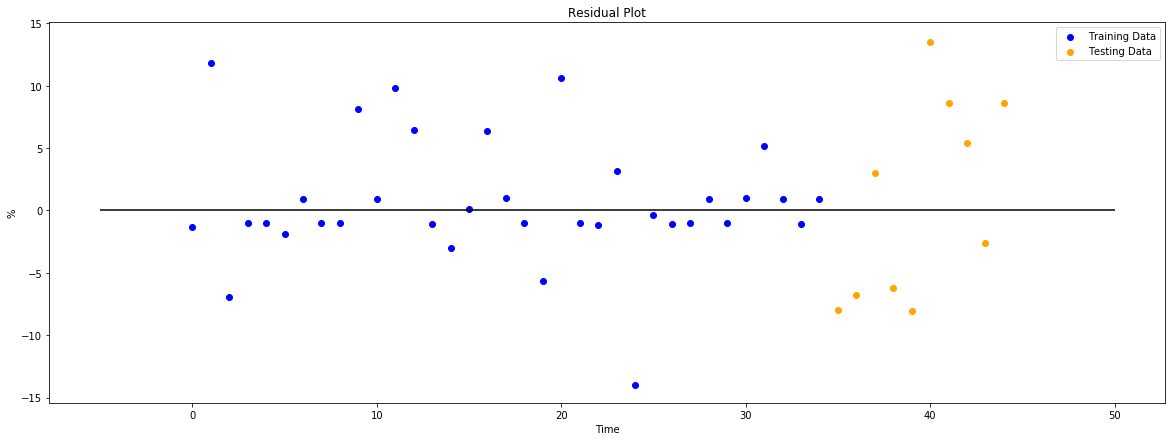

In [25]:
# #Residual Plot SVM
plt.figure(figsize=(20,7))
plt.scatter(date_train_range, train_perc, c="blue", label="Training Data")
plt.scatter(date_test_range, test_perc, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=-5, xmax=50)
plt.title("Residual Plot")
plt.xlabel("Time")
plt.ylabel("%")
plt.savefig("SVM_Residual_Plot.png")

In [26]:
print("Random Forest mae and mse:")
print("")
print("Mean Absolute Error= ", randomF_mae) 
print("Mean Squarred Error= ", randomF_mse)
print("")
print("#----------------------------------------#")
print("Linear Regression mae and mse:")
print("")
print("Mean Absolute Error = ", linear_reg_mae) 
print("Mean Squarred Error= ", linear_reg_mse)
print("")
print("#----------------------------------------#")
print("SVM mae and mse:")
print("")
print("Mean Absolute Error = ", svm_mae) 
print("Mean Squarred Error= ", svm_mse) 
print("")
print("#----------------------------------------#")

Random Forest mae and mse:

Mean Absolute Error=  10.173499999999999
Mean Squarred Error=  123.97947749999999

#----------------------------------------#
Linear Regression mae and mse:

Mean Absolute Error =  24.705689904663686
Mean Squarred Error=  1113.5149237601868

#----------------------------------------#
SVM mae and mse:

Mean Absolute Error =  9.707423586853114
Mean Squarred Error=  116.78891744085112

#----------------------------------------#
